#                                                  Bike DataSet 

### Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

Content
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: Record index
dteday: Date
season: Season (1:springer, 2:summer, 3:fall, 4:winter) 

yr: Year (0: 2011, 1:2012) 

mnth: Month (1 to 12) 

hr: Hour (0 to 23)

holiday: weather day is holiday or not (extracted from Holiday Schedule)

weekday: Day of the week

workingday: If day is neither weekend nor holiday is 1, otherwise is 0.

weathersit: (extracted from Freemeteo)


1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly 
scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only 

in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas_profiling

# Problem Statement :
The objective of this Case is to Predication of bike rental count on hour based, which depends  on the environmental and seasonal settings.

**Contents :-**
             
        1. Exploratory Data Analysis
           * Loading the dataset and libraries
           * Data cleaning
           * Typecasting the attributes
           * Missing value analysis
        2. Attributes distributions and trends
           * Hourly distribution of counts 
           * Monthly distribution of counts
           * Yearly distribution of counts
           * Outliers analysis
        3. Normality test
        4. Correlation matrix 
        5. Split the dataset into train and test dataset
        6. Encoding the categorical features
        7. Modelling the training dataset
           * Linear Regression Model
           * Decision Tree Regressor Model
           * Random Forest Model
        8. Cross Validation Prediction
           * Linear Regression CV Prediction
           * Decision Tree Regressor CV Prediction
           * Random Forest CV Prediction
        9. Model performance on test dataset
           * Linear Regression Prediction
           * Decision Tree Regressor Prediction
           * Random Forest Prediction
        10. Model Evaluation Metrics
           * R-squared score
           * Root mean square error
           * Mean absolute error
        11.Choosing best model for predicting bike rental count

### Exploratory Data Analysis
           1. Exploratory Data Analysis
           * Loading the dataset and libraries
           * Data cleaning
           * Typecasting the attributes
           * Missing value analysis  

In [2]:
data=pd.read_csv("hour.csv")

In [3]:
data.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [5]:
profile= pandas_profiling.ProfileReport(data)
profile.to_file(output_file="bike_hour1.html")

In [4]:
data.shape # it has 17379 records init


(17379, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
data.describe(include="O")

,dteday
count,17379
unique,731
top,2011-10-22
freq,24


##### Typecasting 

In [8]:

data['dteday']=pd.to_datetime(data.dteday)

data['season']=data.season.astype('category')
data['yr']=data.yr.astype('category')
data['mnth']=data.mnth.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weathersit']=data.weathersit.astype('category')

In [9]:
data.isnull().sum()
# result shows that there is no missing values 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# 2. Attributes distributions and trends
           * Hourly distribution of counts 
           * Weekday wise hourly distribution of counts
           * Holiday Wise hourly distribution of counts
           * Weather wise  hourly distribution count
           * Outliers analysis

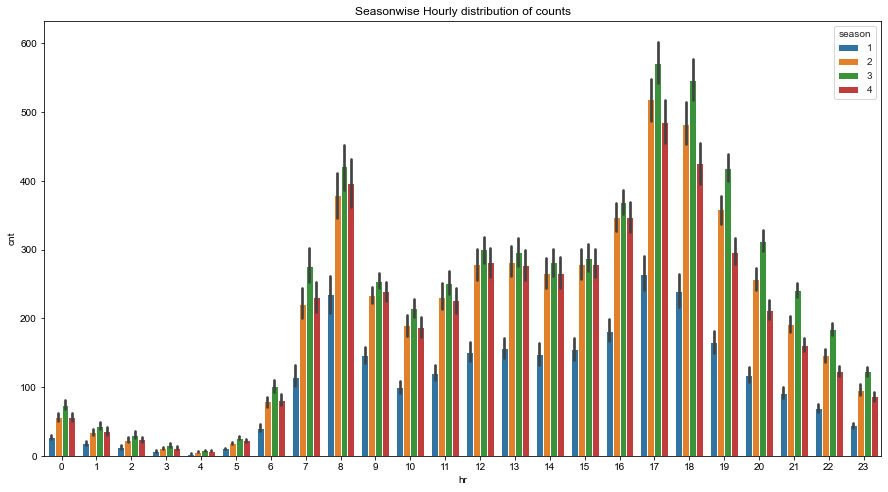

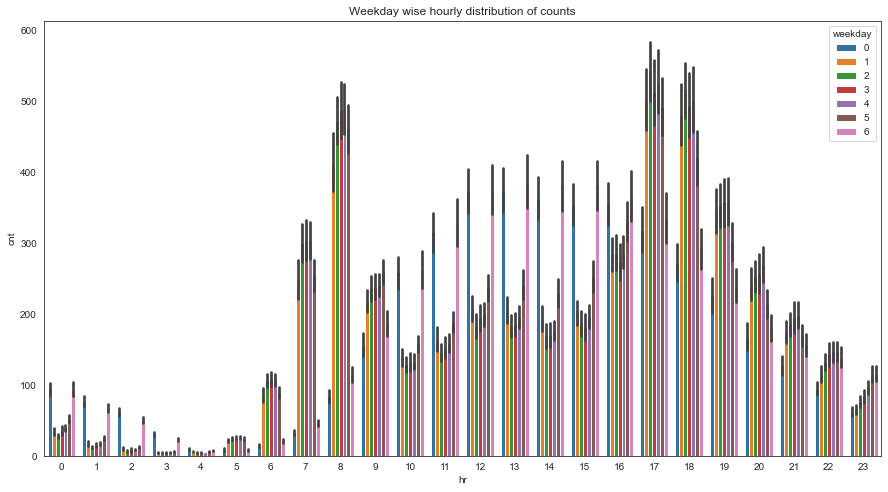

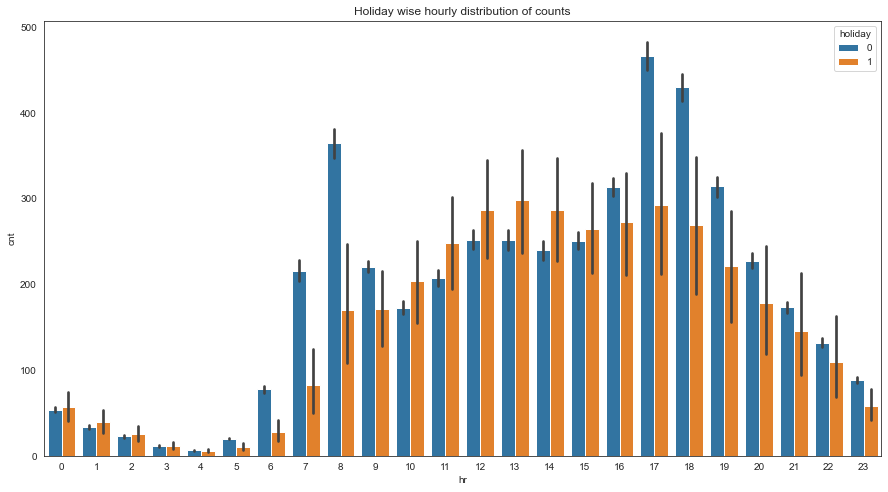

In [10]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise hourly distribution of counts
sns.barplot(x='hr',y='cnt',data=data[['hr','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise Hourly distribution of counts')
plt.show()

#Bar plot for weekday wise Hourly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='hr',y='cnt',data=data[['hr','cnt','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise hourly distribution of counts')
plt.show()

#Bar plot for holidaywise Hourly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='hr',y='cnt',data=data[['hr','cnt','holiday']],hue='holiday',ax=ax1)
ax1.set_title('Holiday wise hourly distribution of counts')
plt.show()

From the above plots, we can observed that increasing the bike rental is very high between 1700 -18:00 hrs in all seasons,holdays and workimgdays. however specically on working days the bike rental is also high in moring 08:00 AM

We also observed that increasing the bike rental count is high in Fall. In summer and spring the average bike rental is almost same season and then decreasing the bike rental count in spring in each hour.

season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

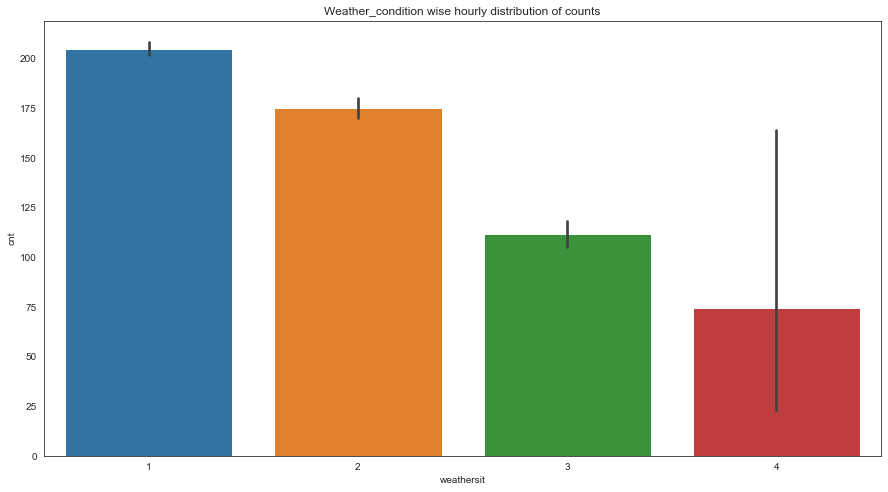

In [11]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weathersit',y='cnt',data=data[['mnth','cnt','weathersit']],ax=ax1)
ax1.set_title('Weather_condition wise hourly distribution of counts')
plt.show()

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

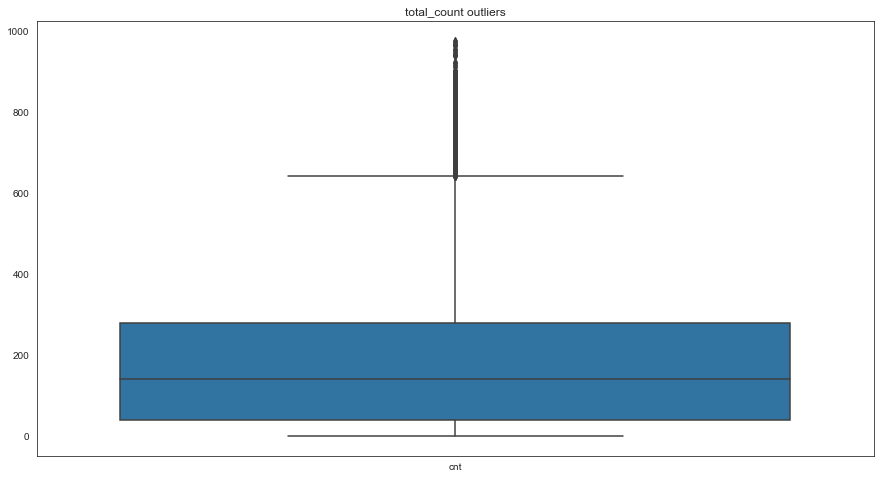

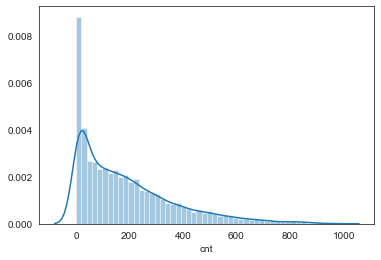

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=data[['cnt']])
ax.set_title('total_count outliers')
plt.show()
sns.distplot(data["cnt"],kde=True)
plt.show()

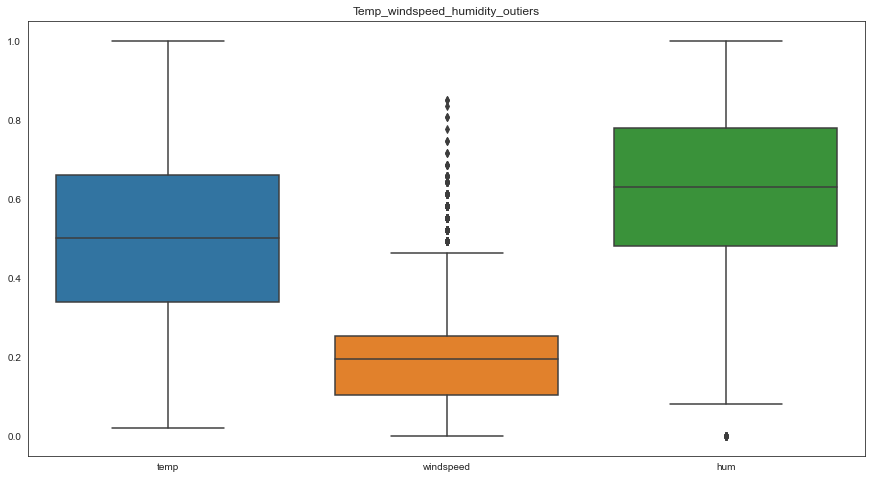

In [26]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=data[['temp','windspeed','hum']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

In [13]:
data[["cnt","windspeed","hum"]].describe()

,cnt,windspeed,hum
count,17379.000000,17379.000000,17379.000000
mean,189.463088,0.190098,0.627229
std,181.387599,0.122340,0.192930
min,1.000000,0.000000,0.000000
25%,40.000000,0.104500,0.480000
50%,142.000000,0.194000,0.630000
75%,281.000000,0.253700,0.780000
max,977.000000,0.850700,1.000000


In [14]:
data.iloc[data.windspeed.argmax()]

instant                      4316
dteday        2011-07-03 00:00:00
season                          3
yr                              0
mnth                            7
hr                             17
holiday                         0
weekday                         0
workingday                      0
weathersit                      3
temp                          0.8
atemp                      0.7424
hum                          0.49
windspeed                  0.8507
casual                        181
registered                    177
cnt                           358
Name: 4315, dtype: object

In [15]:
#create dataframe for outliers
wind_hum=pd.DataFrame(data,columns=['windspeed'])
 #Cnames for outliers                     
cnames=['windspeed']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA

In [21]:
data["windspeed"]=wind_hum["windspeed"]
#data["windspeed"]=data["windspeed"].replace(wind_hum["windspeed"])


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [23]:
data.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed     342
casual          0
registered      0
cnt             0
dtype: int64

In [24]:
data.dropna(axis=0,inplace=True)
# we droped 317 na values from rows 

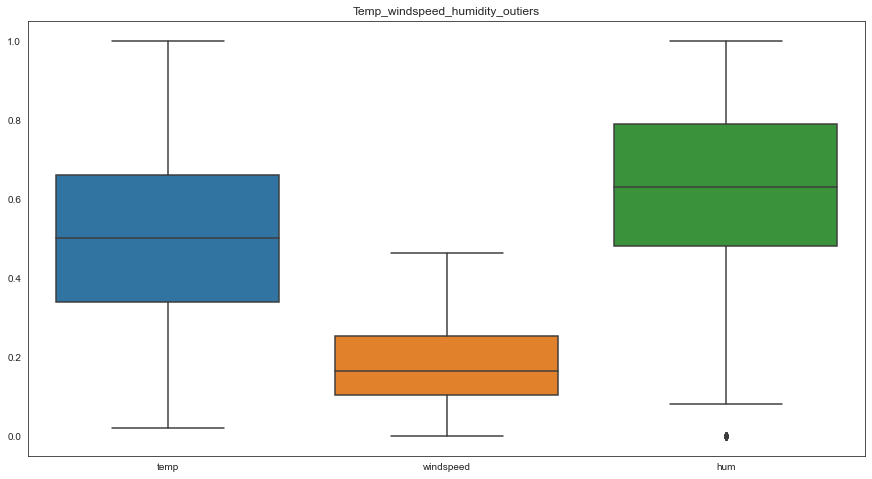

In [25]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=data[['temp','windspeed','hum']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

# 3. Normality test

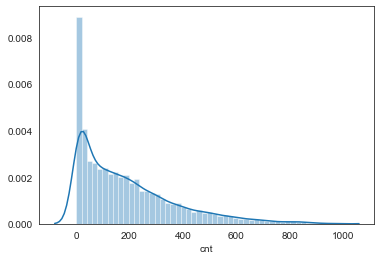

In [26]:
sns.distplot(data["cnt"],kde=True)

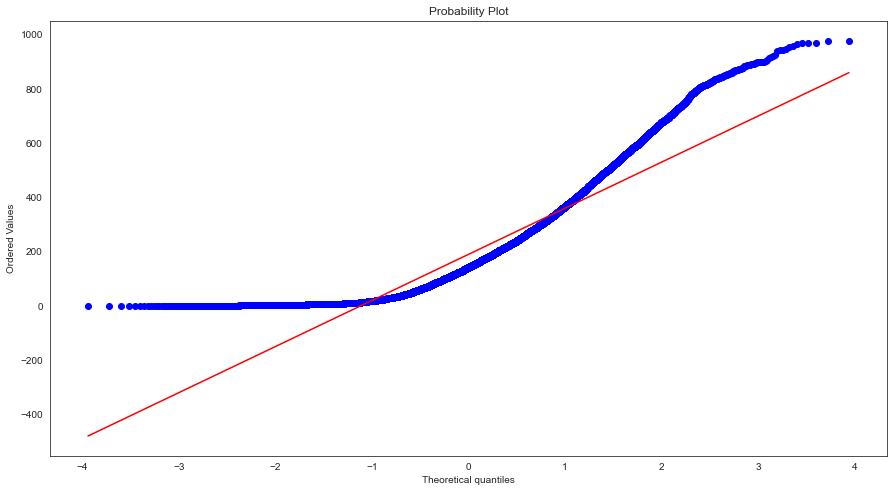

skewness: 1.272688
kurtosis: 1.398224


In [31]:
import scipy
from scipy import stats
# Normal Plot 
fig= plt.figure(figsize=(15,8))
stats.probplot(data.cnt.tolist(),dist="norm",plot=plt)
plt.show()
print("skewness: %f" % data["cnt"].skew())
print("kurtosis: %f" % data["cnt"].kurt())

In [28]:
data.corr()

,instant,hr,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,-0.002528,0.135851,0.137129,0.004985,-0.068904,0.157265,0.281368,0.277541
hr,-0.002528,1.000000,0.139460,0.136369,-0.276800,0.132101,0.304735,0.376748,0.397219
temp,0.135851,0.139460,1.000000,0.987824,-0.078434,-0.006581,0.458265,0.333453,0.402824
atemp,0.137129,0.136369,0.987824,1.000000,-0.061883,-0.044237,0.452714,0.330528,0.398875
hum,0.004985,-0.276800,-0.078434,-0.061883,1.000000,-0.274418,-0.353258,-0.278842,-0.328709
windspeed,-0.068904,0.132101,-0.006581,-0.044237,-0.274418,1.000000,0.105188,0.094836,0.107730
casual,0.157265,0.304735,0.458265,0.452714,-0.353258,0.105188,1.000000,0.506499,0.694485
registered,0.281368,0.376748,0.333453,0.330528,-0.278842,0.094836,0.506499,1.000000,0.972144
cnt,0.277541,0.397219,0.402824,0.398875,-0.328709,0.107730,0.694485,0.972144,1.000000


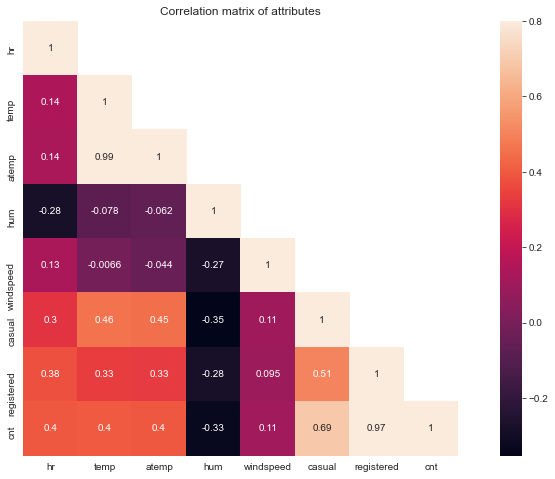

In [29]:
#Create the correlation matrix
correMtr=data[["hr","temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count and registered are highly positively correlated to each other. So, we are going to ignore atemp and registered variable for further analysis.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17037 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17037 non-null  int64         
 1   dteday      17037 non-null  datetime64[ns]
 2   season      17037 non-null  category      
 3   yr          17037 non-null  category      
 4   mnth        17037 non-null  category      
 5   hr          17037 non-null  int64         
 6   holiday     17037 non-null  category      
 7   weekday     17037 non-null  category      
 8   workingday  17037 non-null  category      
 9   weathersit  17037 non-null  category      
 10  temp        17037 non-null  float64       
 11  atemp       17037 non-null  float64       
 12  hum         17037 non-null  float64       
 13  windspeed   17037 non-null  float64       
 14  casual      17037 non-null  int64         
 15  registered  17037 non-null  int64         
 16  cnt         17037 non-

In [37]:
df=data.iloc[:,[2,3,4,5,6,7,8,9,10,12,13,14,16]]
df.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,40


###  Normalisation the data

In [40]:
# Normalised the data using standard scaler
from sklearn.preprocessing  import StandardScaler
scaler= StandardScaler()
df[["temp","hum","windspeed","casual","cnt","hr"]]=scaler.fit_transform(df[["hr","temp","hum","windspeed","casual","cnt"]])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17037 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17037 non-null  category
 1   yr          17037 non-null  category
 2   mnth        17037 non-null  category
 3   hr          17037 non-null  float64 
 4   holiday     17037 non-null  category
 5   weekday     17037 non-null  category
 6   workingday  17037 non-null  category
 7   weathersit  17037 non-null  category
 8   temp        17037 non-null  float64 
 9   hum         17037 non-null  float64 
 10  windspeed   17037 non-null  float64 
 11  casual      17037 non-null  float64 
 12  cnt         17037 non-null  float64 
dtypes: category(7), float64(6)
memory usage: 1.0 MB


# 6.  Encoding the categorical features

In [43]:
cat_attributes=["season","yr","holiday","weekday","workingday","weathersit"]
#To get dummy variables to encode the categorical features to numeric
data_model=pd.get_dummies(df,columns=cat_attributes)
print('Shape of transfomed dataframe::',data_model.shape)
data_model.head(5)

Shape of transfomed dataframe:: (17037, 28)


,mnth,hr,temp,hum,windspeed,casual,cnt,season_1,season_2,season_3,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,-0.955403,-1.659341,-1.339443,0.938219,-1.633092,-0.662781,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1,1,-0.823345,-1.515106,-1.443237,0.886043,-1.633092,-0.561570,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,1,-0.867364,-1.370872,-1.443237,0.886043,-1.633092,-0.622297,1,0,0,...,0,0,0,1,1,0,1,0,0,0
3,1,-0.971911,-1.226638,-1.339443,0.625162,-1.633092,-0.662781,1,0,0,...,0,0,0,1,1,0,1,0,0,0
4,1,-1.037940,-1.082404,-1.339443,0.625162,-1.633092,-0.723508,1,0,0,...,0,0,0,1,1,0,1,0,0,0


# 5.Split the dataset into train and test dataset

In [106]:
X= data_model.iloc[:,0:-3]
y= data_model.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

#Reset train index values

X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

#### Reset train index values

X_test.reset_index(inplace=True)
y_test=y_test.reset_index()


In [107]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(11925, 25) (5112, 25) (11925,) (5112,)
2745     0
1307     0
8117     0
16178    0
16294    0
Name: weathersit_4, dtype: uint8
11823    0
13957    0
10694    0
2245     0
5200     0
Name: weathersit_4, dtype: uint8


In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11925 entries, 2745 to 16113
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mnth          11925 non-null  category
 1   hr            11925 non-null  float64 
 2   temp          11925 non-null  float64 
 3   hum           11925 non-null  float64 
 4   windspeed     11925 non-null  float64 
 5   casual        11925 non-null  float64 
 6   cnt           11925 non-null  float64 
 7   season_1      11925 non-null  uint8   
 8   season_2      11925 non-null  uint8   
 9   season_3      11925 non-null  uint8   
 10  season_4      11925 non-null  uint8   
 11  yr_0          11925 non-null  uint8   
 12  yr_1          11925 non-null  uint8   
 13  holiday_0     11925 non-null  uint8   
 14  holiday_1     11925 non-null  uint8   
 15  weekday_0     11925 non-null  uint8   
 16  weekday_1     11925 non-null  uint8   
 17  weekday_2     11925 non-null  uint8   
 18  wee

#  7. Modelling the training dataset
           * Linear Regression Model
           * Decision Tree Regressor Model
           * Random Forest Model

In [109]:
from sklearn import preprocessing,metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [110]:
# linear regresssion 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()


In [111]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [112]:
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.002649493400156966
Model coefficients : [-1.68986959e-04 -2.06687002e-06  1.26903859e-04 -4.09797658e-04
  4.33080242e-04  9.78203336e-05  1.81111713e-04  1.86905630e+08
  1.86905630e+08  1.86905630e+08  1.86905630e+08 -3.97563328e+05
 -3.97563327e+05 -2.64193187e+06  2.90013590e+06  4.69123339e+06
 -8.50834383e+05 -8.50834384e+05 -8.50834383e+05 -8.50834384e+05
 -8.50834384e+05  4.69123339e+06 -4.84997703e+06  6.92090741e+05
 -3.79371964e-04]
Model intercept value : -183707391.49550733


In [113]:
lr_pred=lr_model.predict(X_test)
lr_pred

array([-4.02629375e-05, -1.63525343e-04,  3.41802835e-04, ...,
       -3.69340181e-04,  4.54008579e-04, -5.75125217e-04])

In [114]:
# model evaluation 
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 0.0008612936393272521
Mean absolute error : 0.0006682676363718901


In [115]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.00012434906577555674


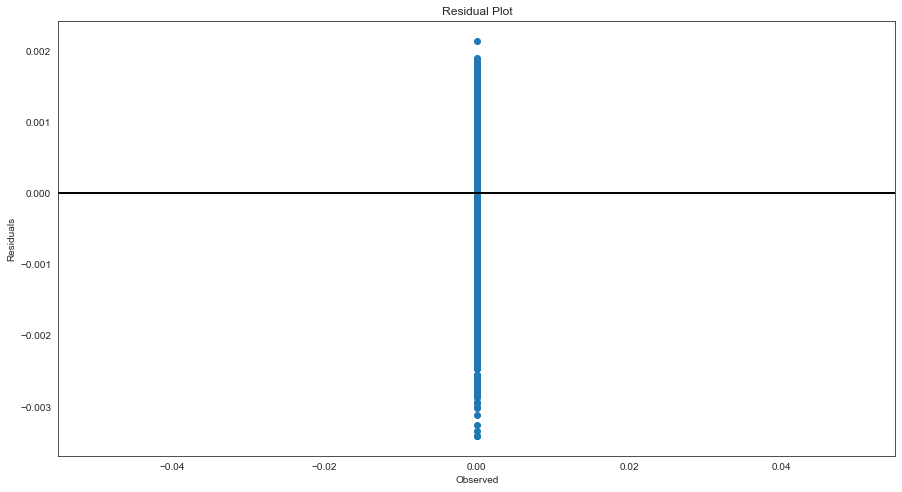

In [116]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

In [147]:
# finding result for the data
X_input=data_model.iloc[250:260,0:-3]
y_output=data_model.iloc[250:260,-1]
y_pred=lr_model.predict(X_input)


In [148]:
rmse=math.sqrt(metrics.mean_squared_error(y_output,y_pred))

In [149]:
print(rmse)

0.002159790132988522


In [167]:
Bike_df1=pd.DataFrame(y_output,columns=['y_output'])
Bike_df2=pd.DataFrame(y_pred,columns=['y_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
#Bike_predictions.to_csv('Bike_Renting_Python.csv')
Bike_predictions.head()

,y_output,y_pred


## Descision Tree 

In [150]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [151]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [152]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 1.0


In [153]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([0., 0., 0., ..., 0., 0., 0.])

In [155]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [156]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 0.013986355971611485
Mean absolute error : 0.00019561815336463224


###  Random Forest

In [158]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)

In [159]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [160]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.8242974647710116


In [161]:
#Cross validation prediction
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([0., 0., 0., ..., 0., 0., 0.])

In [162]:
#R-squared scores
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : -0.6713871414192244


In [164]:
#predict the model
rf_pred=rf.predict(X_test)
rf_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [165]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 0.008354433381175577
Mean absolute error : 0.00027973395931142413


**Final model for predicting the bike rental count on daily basis**

When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. So, finally random forest model is bset for predicting the bike rental count on daily basis.